In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/pokemons.csv')

In [ ]:
df.head()

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."


#Question 1
Does having two types affect the total stats of a pokemon?

In [ ]:
average_stats_by_type_count = df.groupby('type2').agg({'total': 'mean'}).reset_index()

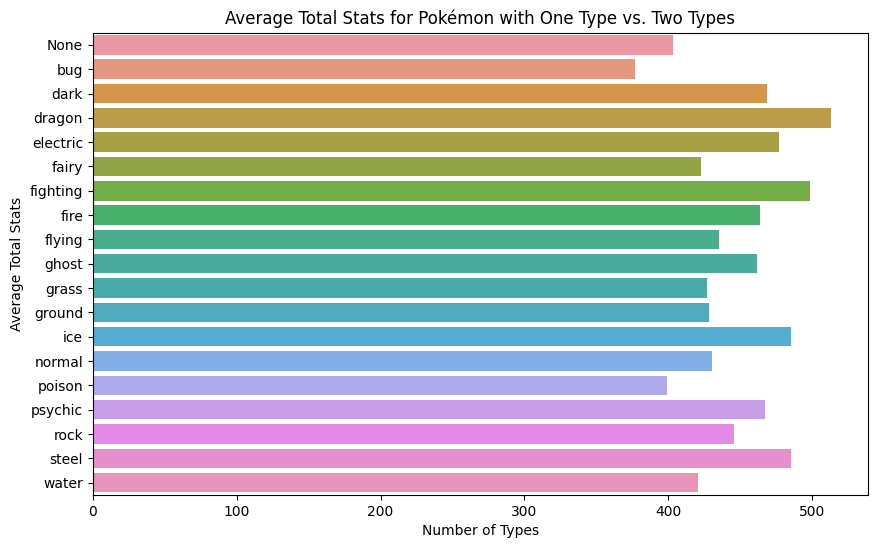

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total', y='type2', data=average_stats_by_type_count)
plt.xlabel('Number of Types')
plt.ylabel('Average Total Stats')
plt.title('Average Total Stats for Pokémon with One Type vs. Two Types')
plt.show()

#Question 2
Which generation has the highest average stats?

In [ ]:
df.groupby('generation')['total'].mean()

generation
1.0    407.642384
2.0    407.180000
3.0    403.725926
4.0    445.570093
5.0    425.756410
6.0    429.305556
7.0    449.409091
8.0    439.218750
9.0    449.437500
Name: total, dtype: float64

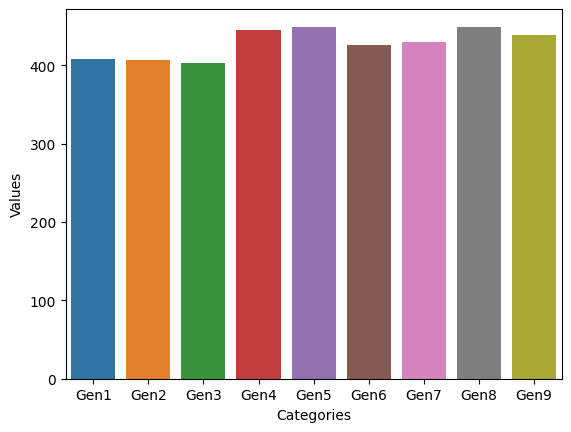

In [ ]:
categories = ['Gen1', 'Gen2', 'Gen3', 'Gen4', 'Gen5', 'Gen6', 'Gen7', 'Gen8', 'Gen9']
values = [407.6, 407.2, 403.7, 445.6, 449.4, 425.8, 429.3, 449.4, 439.2]

sns.barplot(x=categories, y=values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

#Question 3
Is there any correlation between Special Attack and Special Defense for Lengendary Pokemon?

In [ ]:
legendary_pokemon = df[df['rank'] == 'legendary']

In [ ]:
correlation_coefficient = legendary_pokemon['spatk'].corr(legendary_pokemon['spdef'])

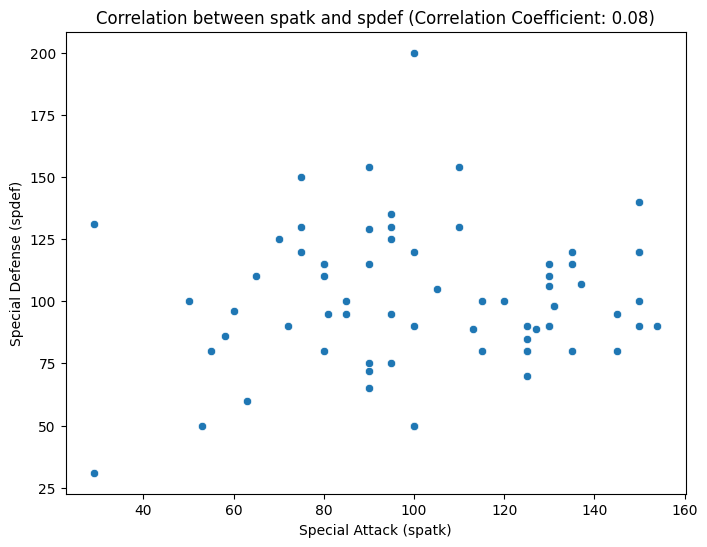

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='spatk', y='spdef', data=legendary_pokemon)
plt.xlabel('Special Attack (spatk)')
plt.ylabel('Special Defense (spdef)')
plt.title(f'Correlation between spatk and spdef (Correlation Coefficient: {correlation_coefficient:.2f})')
plt.show()

#Question 4
Does a Pokemon's weight affect its speed?

In [ ]:
filter = df.dropna(subset=['weight', 'speed'])

In [ ]:
# Calculate the correlation coefficient between 'weight' and 'speed' (Chatgpt)
correlation_coefficient, _ = stats.pearsonr(filter['weight'], filter['speed'])

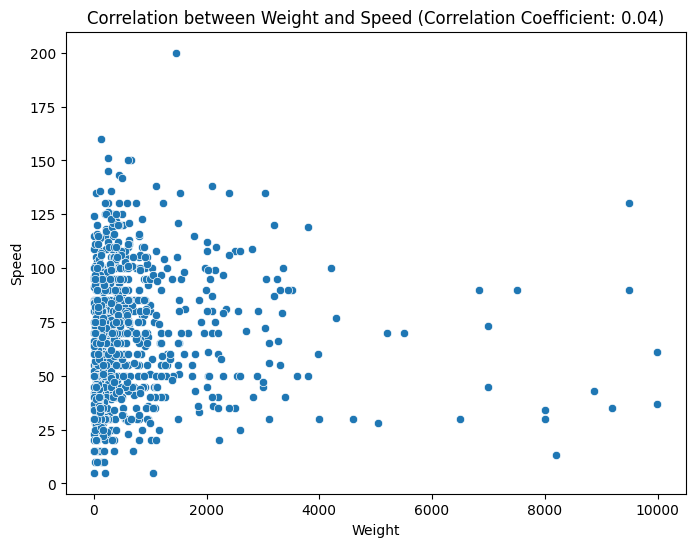

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='speed', data=filter)
plt.xlabel('Weight')
plt.ylabel('Speed')
plt.title(f'Correlation between Weight and Speed (Correlation Coefficient: {correlation_coefficient:.2f})')
plt.show()

#Question 5
Which Pokemon are Psuedo-Legendaries?

In [ ]:
total_stat_threshold = 600

In [ ]:
pseudo_legendary_pokemon = df[(df['total'] == total_stat_threshold) & (df['evolves_from'].notna())]

In [ ]:
exclude = ['mythical', 'legendary']
pseudo_legendary_pokemon = pseudo_legendary_pokemon[~pseudo_legendary_pokemon['rank'].isin(exclude)]

In [ ]:
pseudo_legendary_pokemon

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
148,149,dragonite,ordinary,1.0,dragonair,dragon,flying,91,134,95,100,100,80,600,22,2100,inner-focus multiscale,An extremely rarely seen marine POKéMON. Its i...
247,248,tyranitar,ordinary,2.0,pupitar,rock,dark,100,134,110,95,100,61,600,20,2020,sand-stream unnerve,Its body can't be harmed by any sort of attack...
372,373,salamence,ordinary,3.0,shelgon,dragon,flying,95,135,80,110,80,100,600,15,1026,intimidate moxie,"SALAMENCE came about as a result of a strong, ..."
375,376,metagross,ordinary,3.0,metang,steel,psychic,80,135,130,95,90,70,600,16,5500,clear-body light-metal,"METAGROSS has four brains in total. Combined, ..."
444,445,garchomp,ordinary,4.0,gabite,dragon,ground,108,130,95,80,85,102,600,19,950,sand-veil rough-skin,When it folds up its body and extends its wing...
634,635,hydreigon,ordinary,5.0,zweilous,dark,dragon,92,105,90,125,90,98,600,18,1600,levitate,This brutal Pokémon travels the skies on its s...
705,706,goodra,ordinary,6.0,sliggoo,dragon,None,90,100,70,110,150,80,600,20,1505,sap-sipper hydration gooey,This very friendly Dragon-type Pokémon will hu...
783,784,kommo-o,ordinary,7.0,hakamo-o,dragon,fighting,75,110,125,100,105,85,600,16,782,bulletproof soundproof overcoat,"When it spots enemies, it threatens them by ji..."
886,887,dragapult,ordinary,8.0,drakloak,dragon,ghost,88,120,75,100,75,142,600,30,500,clear-body infiltrator cursed-body,"When it isn’t battling, it keeps Dreepy in the..."
997,998,baxcalibur,ordinary,9.0,arctibax,dragon,ice,115,145,92,75,86,87,600,21,2100,thermal-exchange ice-body,This Pokémon blasts cryogenic air out from its...


#Machine Learning Algorithm

In [ ]:
#ChatGpt
roman_to_int = {
    'i': 1,
    'ii': 2,
    'iii': 3,
    'iv': 4,
    'v': 5,
    'vi': 6,
    'vii': 7,
    'viii': 8,
    'ix': 9
}

In [ ]:
df['generation'] = df['generation'].str.replace('generation-', '').map(roman_to_int).astype(float)

In [ ]:
X = df[['total', 'abilities', 'generation']]
X

,total,abilities,generation
0,318,overgrow chlorophyll,1.0
1,405,overgrow chlorophyll,1.0
2,525,overgrow chlorophyll,1.0
3,309,blaze solar-power,1.0
4,405,blaze solar-power,1.0
...,...,...,...
1012,508,hospitality heatproof,9.0
1013,555,toxic-chain zero-to-hero,9.0
1014,555,toxic-chain frisk,9.0
1015,555,toxic-chain technician,9.0


In [ ]:
y = df['type1']
y

0        grass
1        grass
2        grass
3         fire
4         fire
         ...  
1012     grass
1013    poison
1014    poison
1015    poison
1016     grass
Name: type1, Length: 1017, dtype: object

In [ ]:
#ChatGpt
X_encoded = pd.get_dummies(X, columns=['abilities'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
RandFor = RandomForestClassifier(n_estimators=100, random_state=42)
RandFor.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = RandFor.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 52.94%
